In [1]:
import numpy as np

In [6]:
nd_ = dir(np.array([1,2,3]))

In [8]:
np_ = dir(np)

In [9]:
set(np_) - set(nd_)

{'ALLOW_THREADS',
 'AxisError',
 'BUFSIZE',
 'CLIP',
 'ComplexWarning',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'ModuleDeprecationWarning',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'PINF',
 'PZERO',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'Tester',
 'TooHardError',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'VisibleDeprecationWarning',
 'WRAP',
 '_CopyMode',
 '_NoValue',
 '_UFUNC_API',
 '__NUMPY_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__deprecated_attrs__',
 '__expired_functions__',
 '__file__',
 '__former_attrs__',
 '__future_scalars__',
 '__getattr__',
 '__git_version__',
 '__loader__',
 '__mkl_version__',
 '_

In [13]:
dir(np.linalg) ## 넘파이 선형대수 함수

['LinAlgError',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_umath_linalg',
 'cholesky',
 'cond',
 'det',
 'eig',
 'eigh',
 'eigvals',
 'eigvalsh',
 'inv',
 'linalg',
 'lstsq',
 'matrix_power',
 'matrix_rank',
 'multi_dot',
 'norm',
 'pinv',
 'qr',
 'slogdet',
 'solve',
 'svd',
 'tensorinv',
 'tensorsolve',
 'test']

In [16]:
def sgn(x):
    return np.where(x > 0, 1, np.where(x==0,0, -1))  ## signum 함수

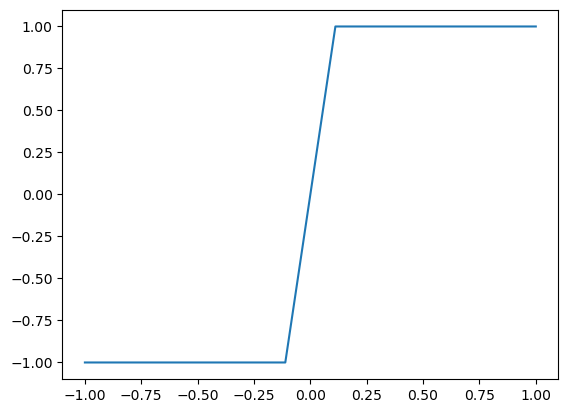

In [17]:
import matplotlib.pyplot as plt
x = np.linspace(-1,1,10)
plt.plot(x, sgn(x))

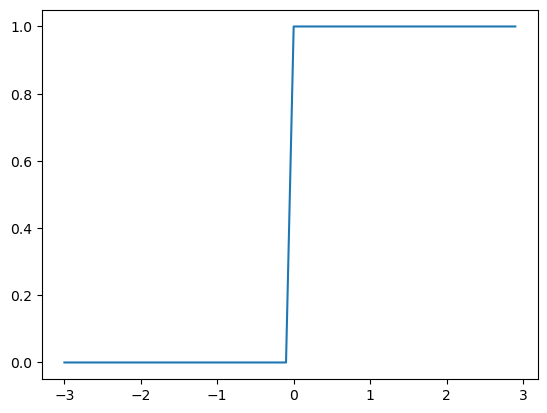

In [18]:
t = np.arange(-3, 3, 0.1)
x = np.heaviside(t, 1)
plt.plot(t, x)
plt.show()

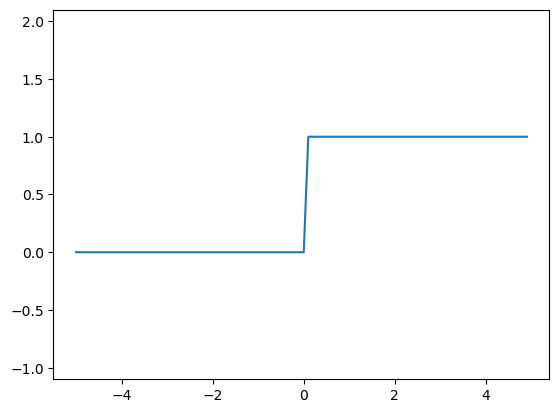

In [22]:
def step_function(x):
    return np.array(x > 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x, y)
plt.ylim(-1.1, 2.1)
plt.show()

In [38]:
X = np.array([[0,1,0,1],[0,0,1,1]])
X = X.T
X
# X.shape

array([[0, 0],
       [1, 0],
       [0, 1],
       [1, 1]])

In [32]:
y_and = np.array([[0],[0], [0],[1]])

In [65]:
def AND(x ,w, b):
    result = np.where(np.dot(x,w) + b >0, 1, 0)
    return np.sum(result == y_and)/4, result

In [66]:
W = np.array([0.0526,1.0]).reshape(2,1)
b= -1
np.where(np.dot(X,W) +b > 0, 1, 0)

array([[0],
       [0],
       [0],
       [1]])

In [67]:
AND(X, W, b)

(1.0,
 array([[0],
        [0],
        [0],
        [1]]))

In [76]:
w1s = np.linspace(-1,1,20)
w2s = np.linspace(-1,1,20)
bs = np.linspace(-1,1,1,20)

for b in bs:
    for w1 in w1s:
        for w2 in w2s:
            W = np.array([w1, w2]).reshape(2,1)
            result = np.where(np.dot(X, W) + b > 0, 1, 0)
            if np.sum(result == y_and) < 4:
                continue;   
            W_and = W
            B_and = b

In [77]:
AND(X, W_and, B_and)

(1.0,
 array([[0],
        [0],
        [0],
        [1]]))

In [115]:
y_and = np.array([[0],[0],[0],[1]])
y_or = np.array([[0],[1],[1],[1]])
y_nand = np.array([[1],[1],[1],[0]])
y_xor = np.array([[0],[1],[1],[0]])

In [162]:
def AND(w, b):
    result = np.where(np.dot(X,w) + b >0, 1, 0)
    return np.sum(result == y_and)/4, result

def OR(w, b):
    result = np.where(np.dot(X,w) + b >0, 1, 0)
    return np.sum(result == y_or)/4, result

def NAND(w, b):
    result = np.where(np.dot(X,w) + b >0, 1, 0)
    return np.sum(result == y_nand)/4, result

def XOR(x, w, b):
    result = np.where(np.dot(x,w) + b >0, 1, 0)
    return np.sum(result == y_xor)/4, result

In [163]:
def logical_test(method):
    w1s = np.linspace(-1,1,20)
    w2s = np.linspace(-1,1,20)
    bs = np.linspace(-1,1,20)
    if method == 'AND':
        y = y_and
    elif method == 'OR':
        y = y_or
    elif method == 'NAND':
        y = y_nand
    elif method == 'XOR':
        y = y_xor
        
    for b in bs:
        for w1 in w1s:
            for w2 in w2s:
                W = np.array([w1, w2]).reshape(2,1)
                result = np.where(np.dot(X, W) + b > 0, 1, 0)
                if np.sum(result == y) >= 4:
                    W_ = W
                    b_ = b
    try:
        W_ = W_
        b_ = b_
        return W_, b_
    except Exception as e:
        print(e)
    

In [164]:
w_nand, b_nand = logical_test('NAND')
w_or, b_or = logical_test('OR')
w_and, b_and = logical_test('AND')

In [166]:
_,s1 = NAND(w_nand, b_nand)
_,s2 = OR(w_or, b_or)
s = np.c_[s1, s2]
XOR(s, w_and, b_and)

(1.0,
 array([[0],
        [1],
        [1],
        [0]]))

In [167]:
X

array([[0, 0],
       [1, 0],
       [0, 1],
       [1, 1]])

In [169]:
w_nand, b_nand, = logical_test('NAND')
w_or, b_or = logical_test('OR')
w_and, b_and = logical_test('AND')

In [182]:
def activation(x):
    return np.where(x > 0, 1, 0) ## 딥러닝에서는 액티베이션이 반드시 있어야 한다

In [179]:
W1 = np.c_[w_nand, w_or]
W2 = w_and

b1 = np.array([b_nand, b_or])
b2 = b_and

y_hat = np.dot(X,W1) + b1
y_hat = activation(y_hat)
y_hat = np.dot(y_hat, W2) + b2
y_hat = activation(y_hat)

In [180]:
y_hat

array([[0],
       [1],
       [1],
       [0]])

In [196]:
def grad(func, x):
    h = 1e-4
    fxh = func(x+h)
    fx = func(x)
    return (fxh - fx) / h

In [197]:
def f(x):
    return 'aaaa'+x

In [199]:
callable(f)

True

In [198]:
f = lambda x:x**3
grad(f,2)

12.000600010022566

In [294]:
x = np.arange(8).reshape(4,2).astype('float')

In [295]:
loss = lambda x : np.mean(x**2+np.log(x+1e-4) - 3)

In [276]:
# h = 1e-4
# tmp = x[0,0] 
# fx = loss(x)
# x[0,0] = tmp+h
# fxh = loss(x)
# (fxh - fx)/h
# x[0,0] = tmp

# tmp = x[1,0]
# fx = loss(x)
# x[1,0] = tmp+h
# fxh = loss(x)
# (fxh - fx)/h
# # x[1,0] = tmp

In [242]:
# x[0,0] = 866.6839756999334
# x[1,0] = 0.56

In [296]:
def grad(loss,x):
    h = 1e-4
    grad_ = np.zeros_like(x)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            tmp = x[i,j]
            fx = loss(x)
            x[i,j] += h
            fxh = loss(x)
            grad_[i,j] = (fxh - fx)/h
    return grad_

In [297]:
grad(loss, x)

array([[8.66433988e+02, 3.74993753e-01],
       [5.62507813e-01, 7.91677083e-01],
       [1.03126133e+00, 1.27501175e+00],
       [1.52084531e+00, 1.76786926e+00]])

In [298]:
loss(x)

14.501760848855625

In [299]:
x

array([[1.0000e-04, 1.0001e+00],
       [2.0001e+00, 3.0001e+00],
       [4.0001e+00, 5.0001e+00],
       [6.0001e+00, 7.0001e+00]])

In [395]:
x = np.linspace(-4,3,5)

In [396]:
Activation('step')(x)

array([0, 0, 0, 1, 1])

In [394]:
def grad(loss,*x):
    h = 1e-4
    W, b = x
    
    grad_ = np.zeros_like(W)
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            tmp = W[i,j]
            fx = loss(W,b)
            x[i,j] += h
            fxh = loss(W,b)
            grad_[i,j] = (fxh - fx)/h
    b_ = np.zeros_like(b)
    for i in range(b.size):
        tmp = b[i]
        fx = loss(W,b)
        b[i] += h
        fxh = loss(W,b)
        b_[i] = (fxh-fx)/2
    return grad_, b_

In [390]:
class Activation:
    def __init__(self, activation):
        self.activation = activation
        
    def __call__(self, x):
        if self.activation == 'step':
            return self.step(x)
        else:
            return 'Choose your activation !!'
        
    def step(self, x):
        return np.where(x>0,1,0)

In [391]:
def mean_squared_error(*x):
    W, b = x
    y_pred = np.dot(X, W) + b
    y_pred = Activation('step')(y_pred)
    return np.mean(np.square(y_pred - y_nand))

In [397]:
# def mse(*x):
#     W,b = x
#     pred = np.dot(X,W) + b
#     pred = Activation('step')(pred)
#     return np.mean(np.square(pred - y_nand)), W, b

In [398]:
# mse(np.random.randn(2,1),0)

In [388]:
X = np.array([[0,1,0,1],[0,0,1,1]])
X = X.T
y_nand
#w_nand, b_nand = logical_test('NAND')
w_nand = np.random.randn(2,1)
b_nand = 0
predict = np.dot(X,w_nand) + b_nand
predict = Activation('step')(predict)
# mean_squared_error(predict)

In [399]:
grad(mean_squared_error, w_nand, b_nand )

TypeError: '>' not supported between instances of 'tuple' and 'int'